# 공공 데이터 활용

## 30년 이상 노후화된 공공기설물 현황(공동주택 제외)
- [공공시설물] 한국시설안전공단 30년이상 노후화된 공공시설물현황
- https://www.data.go.kr/dataset/15017291/fileData.do

> 데이터분석 미션
- 과제1 : 설립년도별 시설물준공 데이터분석
- 과제2 : 광역시도별 시설물준공 데이터분석
- 과제3 : 분석한 데이터를 원페이지 리포트형태로 출력


In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [6]:
df = pd.read_csv('./data/public_old_buildings_20171016.csv', encoding = 'EUC-KR')
df.head(10)

# encoding: UTF-8, EUC-KR등 

,시설물명,시설물구분,시설물소재지,준공일자
0,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동,19860510
1,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동,19801231
2,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동,19791231
3,사당천복개구조물,교량,서울특별시 서초구 방배동,19801231
4,반포천복개구조물,교량,서울특별시 서초구 서초동,19820929
5,두구교(구),교량,부산광역시 금정구 두구동,19660725
6,진해1부두,항만,경상남도 창원시 진해구 행암동,19700929
7,호형정수장,상하수도,전라남도 고흥군 고흥읍,19820101
8,금사정수장,상하수도,전라남도 고흥군 포두면,19790101
9,신호정수장,상하수도,전라남도 고흥군 도화면,19850101


In [8]:
df.info() 
# 3242, 4, 
# non_null, 
# object -> 문자값
# 준공일자 : 숫자 -> 연도별로 잘라야 겠구나

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3243 entries, 0 to 3242
Data columns (total 4 columns):
시설물명      3243 non-null object
시설물구분     3243 non-null object
시설물소재지    3243 non-null object
준공일자      3243 non-null int64
dtypes: int64(1), object(3)
memory usage: 101.4+ KB


##  과제1 : 설립년도별 시설물준공 데이터분석


- 준공일자 기준으로 정렬

In [10]:
# 값 기준 정렬
df.sort_values(by='준공일자', ascending = 1).head(10)

# 오름차순: default(1)  => 오래된 건물을 다 19000101 로 처리됨.


,시설물명,시설물구분,시설물소재지,준공일자
2011,강정제,하천,대구광역시 달성군 다사읍 죽곡리,19000101
3010,온천3 우수박스,교량,충청남도 아산시 온천동,19000101
3011,큐브모텔 인근,교량,충청남도 아산시 온천동,19000101
3012,배방2 우수박스,교량,충청남도 아산시 배방읍 북수리,19000101
2021,불로제,하천,대구광역시 동구 불로동,19000101
3013,배방1 우수박스,교량,충청남도 아산시 배방읍 공수리,19000101
3014,온천4 우수박스,교량,충청남도 아산시 온천동,19000101
3015,온천2 우수박스,교량,충청남도 아산시 온천동,19000101
3016,실옥우수박스,교량,충청남도 아산시 실옥동,19000101
3017,온천1 우수박스,교량,충청남도 아산시 온천동,19000101


In [12]:
# 컬럼수 확인
df.columns

Index(['시설물명', '시설물구분', '시설물소재지', '준공일자'], dtype='object')

In [15]:
type(df['준공일자'][0])

numpy.int64

- 문자열인 준공일자를 date 객체로 변환


In [16]:
from datetime import datetime

In [19]:
# 문자열을 date형식으로 변경
df['준공일자'] = pd.to_datetime(df['준공일자'], format = '%Y%m%d')
df['준공일자'].head()

0   1986-05-10
1   1980-12-31
2   1979-12-31
3   1980-12-31
4   1982-09-29
Name: 준공일자, dtype: datetime64[ns]

- 준공일자 컬럼을 인덱스로 지정


In [21]:
# 날짜를 인덱스로 지정
df.set_index('준공일자', inplace = True)
df.head()

,시설물명,시설물구분,시설물소재지
준공일자,,,
1986-05-10,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동
1980-12-31,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동
1979-12-31,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동
1980-12-31,사당천복개구조물,교량,서울특별시 서초구 방배동
1982-09-29,반포천복개구조물,교량,서울특별시 서초구 서초동


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3243 entries, 1986-05-10 to 1979-08-20
Data columns (total 3 columns):
시설물명      3243 non-null object
시설물구분     3243 non-null object
시설물소재지    3243 non-null object
dtypes: object(3)
memory usage: 101.3+ KB


- 준공일자 인덱스로부터 준공년 컬럼 추가

In [24]:
# 인덱스에서 year을 뽑기
df.index.year

Int64Index([1986, 1980, 1979, 1980, 1982, 1966, 1970, 1982, 1979, 1985,
            ...
            1985, 1979, 1987, 1984, 1984, 1984, 1984, 1982, 1986, 1979],
           dtype='int64', name='준공일자', length=3243)

In [25]:
# 준공년 파생 변수 추가
df['준공년'] = df.index.year
df.head()

,시설물명,시설물구분,시설물소재지,준공년
준공일자,,,,
1986-05-10,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동,1986
1980-12-31,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1980
1979-12-31,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1979
1980-12-31,사당천복개구조물,교량,서울특별시 서초구 방배동,1980
1982-09-29,반포천복개구조물,교량,서울특별시 서초구 서초동,1982


- 연도별 중공건수 계산
-groupby, value_counts() 둘다 사용 가능

In [26]:
df_year = df['준공년'].value_counts()
df_year.head()

1985    338
1984    269
1986    233
1983    196
1980    188
Name: 준공년, dtype: int64

In [27]:
df_year.index

Int64Index([1985, 1984, 1986, 1983, 1980, 1987, 1982, 1981, 1979, 1977, 1970,
            1978, 1973, 1975, 1974, 1976, 1969, 1971, 1972, 1963, 1965, 1961,
            1964, 1968, 1955, 1962, 1966, 1945, 1967, 1959, 1960, 1958, 1940,
            1939, 1942, 1938, 1930, 1934, 1937, 1954, 1932, 1957, 1936, 1931,
            1935, 1900, 1944, 1926, 1956, 1914, 1922, 1924, 1949, 1953, 1947,
            1906, 1925, 1943, 1950, 1946, 1929, 1921, 1933, 1923, 1928, 1920,
            1912, 1905, 1941, 1952, 1918, 1951, 1911, 1919, 1915, 1948, 1927],
           dtype='int64')

In [29]:
plt.rcParams["figure.figsize"] = [20,12]



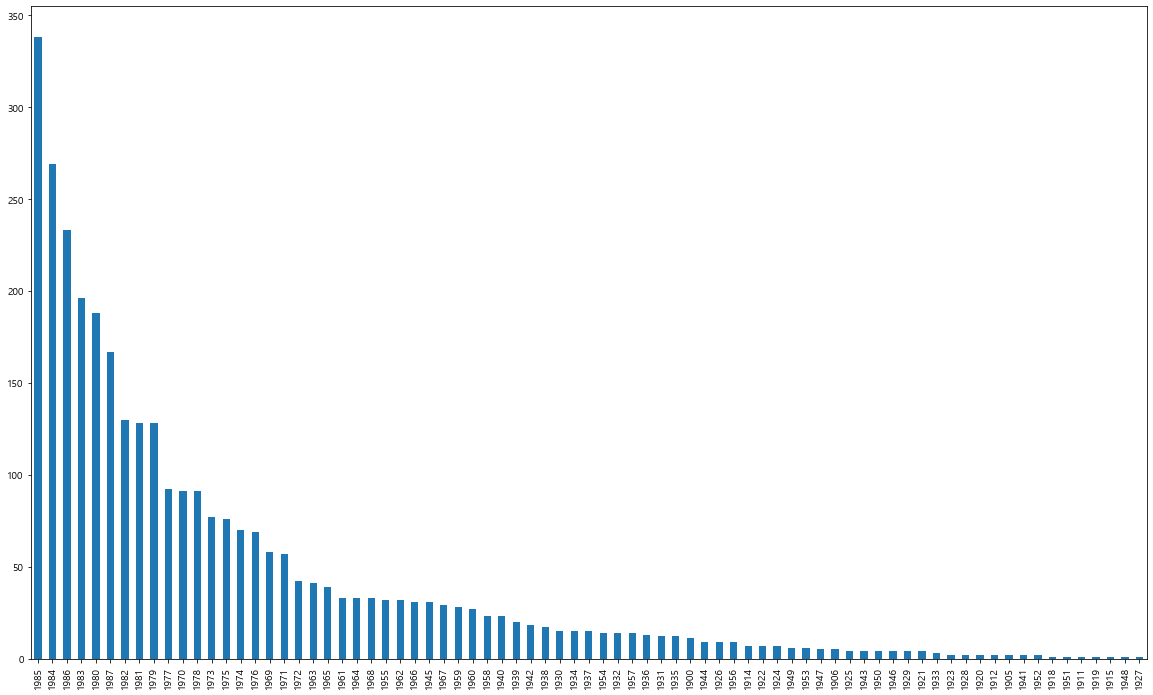

In [31]:
# 연도별로 건물의 수 plot
df_year.plot(kind = 'bar')

- 연도별로 정렬

In [32]:
df_year = df_year.sort_index()
df_year.head()

1900    11
1905     2
1906     5
1911     1
1912     2
Name: 준공년, dtype: int64

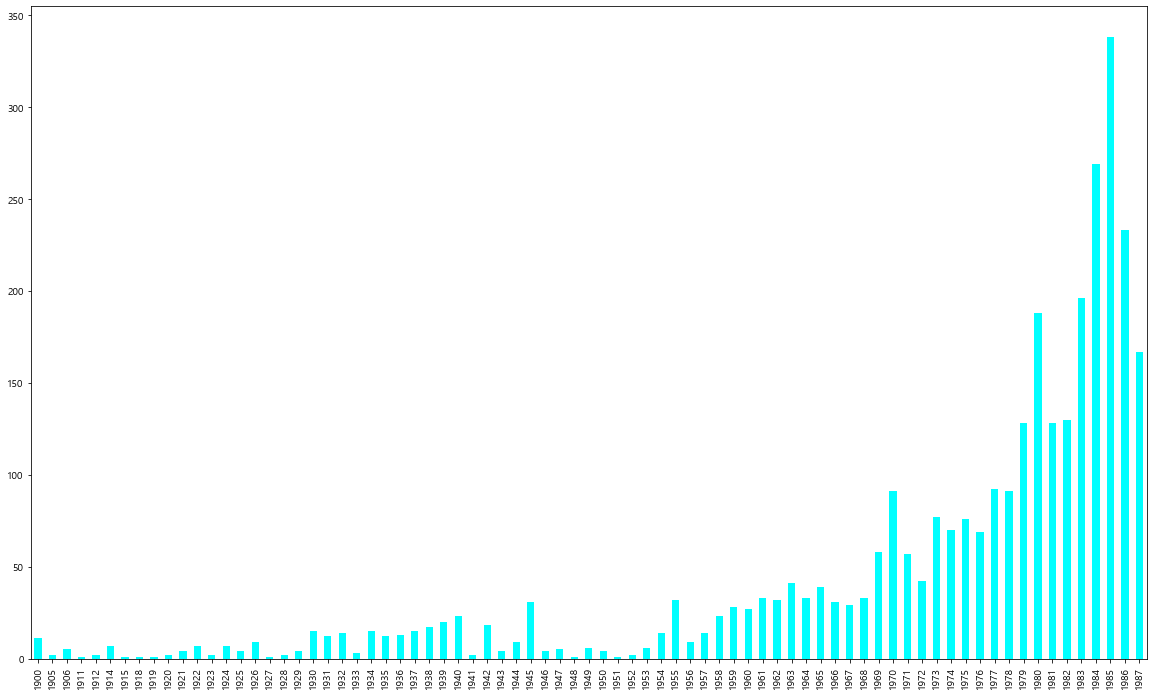

In [43]:
df_year.plot(kind='bar',colormap = 'cool' )

In [34]:
df.head()

,시설물명,시설물구분,시설물소재지,준공년
준공일자,,,,
1986-05-10,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동,1986
1980-12-31,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1980
1979-12-31,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1979
1980-12-31,사당천복개구조물,교량,서울특별시 서초구 방배동,1980
1982-09-29,반포천복개구조물,교량,서울특별시 서초구 서초동,1982


## 과제2 : 광역시도별 시설물준공 데이터분석

- 시를 분리하는 여러가지 방법

In [48]:
# 주소지 살펴보기
df['시설물소재지'].values[100]

'경기도 가평군 외서면'

In [57]:
# find함수 살펴보기
tmp = '부산광역시 부산진구 부암동'
print(tmp)
tmp.find(' ')  # 인덱스를 반환


부산광역시 부산진구 부암동


5

In [60]:
tmp2 = tmp[0:(tmp.find(' '))]
tmp2

'부산광역시'

In [61]:
len(df)

3243

In [64]:
# 글자를 분리하지 않아도 되서 좋은 글자수를 기준으로 분리하는 방법
# txt이기 때문에 슬라이싱으로 글자를 분리
df['시설물소재지'].values[1][0:5] 

# 1: 내부 인덱싱 사용 ,=> iloc도 내부 인덱스 사용

'부산광역시'

In [68]:
tmp3 = df['시설물소재지'].values[1].find(' ')
tmp3

5

In [69]:
df['시설물소재지'].values[1][0:tmp3]


'부산광역시'

- 시/도를 나타내는 state 컬럼 추가


In [71]:
df['state'] = ''


In [73]:
for n in np.arange(len(df)):
    endN = df['시설물소재지'].values[n].find(' ')
    df['state'].values[n ] = df['시설물소재지'].values[n][0:endN]

In [74]:
df.head()

,시설물명,시설물구분,시설물소재지,준공년,state
준공일자,,,,,
1986-05-10,부암1동 동부교육청 입구 옹벽,옹벽,부산광역시 부산진구 부암동,1986,부산광역시
1980-12-31,전포천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1980,부산광역시
1979-12-31,부전천본류 복개구조물,교량,부산광역시 부산진구 부전2동,1979,부산광역시
1980-12-31,사당천복개구조물,교량,서울특별시 서초구 방배동,1980,서울특별시
1982-09-29,반포천복개구조물,교량,서울특별시 서초구 서초동,1982,서울특별시


In [75]:
# 파생변수가 잘 만들어졌는지 확인
df['state'].unique()

array(['부산광역시', '서울특별시', '경상남도', '전라남도', '대구광역시', '전라북도', '인천광역시', '충청북도',
       '강원도', '제주특별자치도', '경기도', '충청남도', '광주광역시', '경상북도', '대전광역시',
       '세종특별자치시', '울산광역시'], dtype=object)

In [77]:
# 시/도별 준공 건수
df_state = df['state'].value_counts()
df_state

서울특별시      609
경상북도       454
경상남도       369
강원도        244
경기도        213
전라남도       210
충청북도       204
충청남도       203
전라북도       187
부산광역시      160
대구광역시      105
광주광역시       92
대전광역시       59
인천광역시       55
울산광역시       53
세종특별자치시     14
제주특별자치도     12
Name: state, dtype: int64

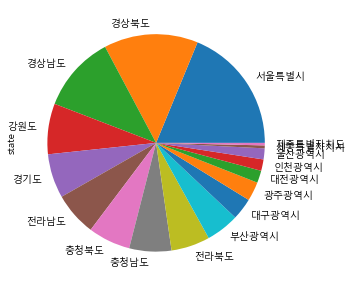

In [80]:
# 파이차트 그리기
plt.rcParams["figure.figsize"] = [15,5]
df_state.plot(kind = 'pie')
plt.show()

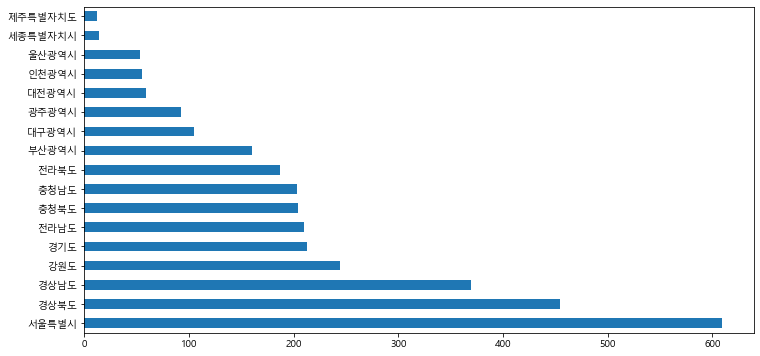

In [81]:
# bar chart 그리기
plt.rcParams["figure.figsize"] = [12,6]
df_state.plot(kind = 'barh')
plt.show()

In [83]:
# 내림차순 정렬
df_state.sort_values().head()  # 오름차순 = True: default

제주특별자치도    12
세종특별자치시    14
울산광역시      53
인천광역시      55
대전광역시      59
Name: state, dtype: int64

In [86]:
# 오름차순 정렬
df_state.sort_values(ascending = False).head()

서울특별시    609
경상북도     454
경상남도     369
강원도      244
경기도      213
Name: state, dtype: int64

## 과제3 : 분석한 데이터를 원페이지 리포트형태로 출력

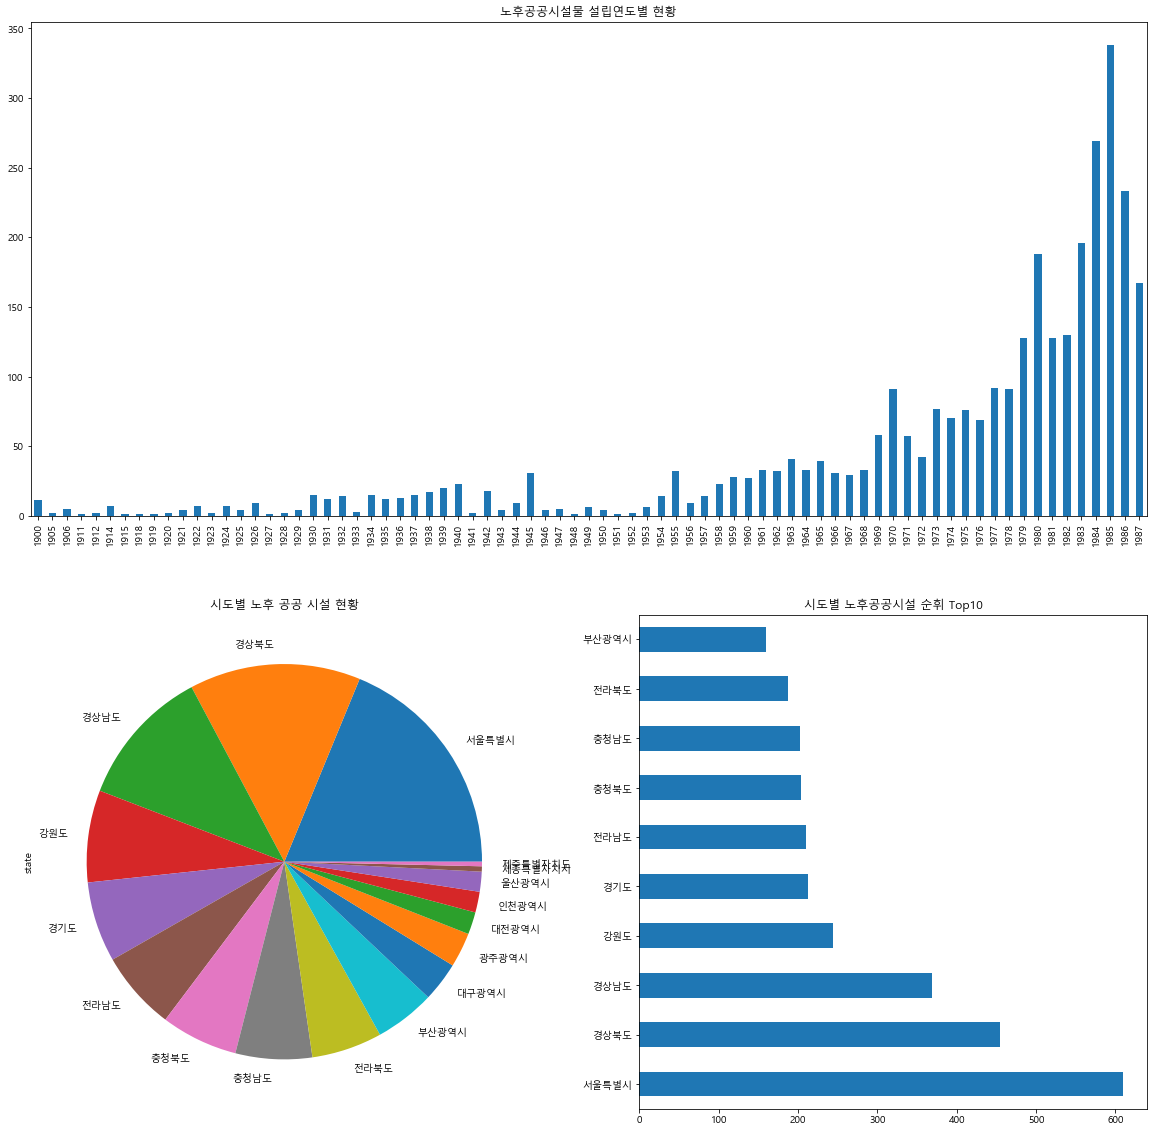

In [87]:
plt.figure(figsize = (20, 20))

plt.subplot(211)
plt.title('노후공공시설물 설립연도별 현황')
df_year.plot(kind= 'bar')

plt.subplot(223)
plt.title('시도별 노후 공공 시설 현황')
df_state.plot(kind = 'pie')

plt.subplot(224)
plt.title('시도별 노후공공시설 순휘 Top10')
df_state.head(10).plot(kind = 'barh')

plt.show()